<a href="https://colab.research.google.com/github/jamesdvance/BraceYourself/blob/main/SAM_Personalize_One_Shot_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### SAM Personalize
Using mobileSAM




In [ ]:
!pip install git+https://github.com/ChaoningZhang/MobileSAM.git

  Cloning https://github.com/ChaoningZhang/MobileSAM.git to /tmp/pip-req-build-55pvuolf
  Running command git clone --filter=blob:none --quiet https://github.com/ChaoningZhang/MobileSAM.git /tmp/pip-req-build-55pvuolf
  Resolved https://github.com/ChaoningZhang/MobileSAM.git to commit 01ea8d0f5590082f0c1ceb0a3e2272593f20154b
  Preparing metadata (setup.py) ... done
  Created wheel for mobile-sam: filename=mobile_sam-1.0-py3-none-any.whl size=42432 sha256=c7a85ff331f26e5fa4973d07a1b06449eecfcc534cacf946c1c2884ad695fd9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-kgw9u_vk/wheels/43/b1/9d/1c1b33c31d4c54f0a502f9c48b655f87213ab01e55d09cf4ef
Successfully built mobile-sam


In [ ]:
! git clone https://github.com/ChaoningZhang/MobileSAM.git

Cloning into 'MobileSAM'...
remote: Enumerating objects: 659, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 659 (delta 252), reused 200 (delta 188), pack-reused 371
Receiving objects: 100% (659/659), 78.90 MiB | 26.41 MiB/s, done.
Resolving deltas: 100% (356/356), done.


In [ ]:
! pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import cv2
import torch

In [ ]:
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [ ]:
! ls drive

MyDrive


In [ ]:
model_type = "vit_t"
sam_checkpoint = "./MobileSAM/weights/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()

Sam(
  (image_encoder): TinyViT(
    (patch_embed): PatchEmbed(
      (seq): Sequential(
        (0): Conv2d_BN(
          (c): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): GELU(approximate='none')
        (2): Conv2d_BN(
          (c): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (layers): ModuleList(
      (0): ConvLayer(
        (blocks): ModuleList(
          (0-1): 2 x MBConv(
            (conv1): Conv2d_BN(
              (c): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (act1): GELU(approximate='none')
            (conv2): Conv2d_BN(
 

In [ ]:
img = cv2.imread("drive/MyDrive/braces_and_teeth/teeth2/train/2001.png")

#### Generating All Masks (no prompts)

In [ ]:

mask_generator = SamAutomaticMaskGenerator(mobile_sam)
masks = mask_generator.generate(img)

In [27]:
img[masks[0]["segmentation"]]

array([[ 50,  52,  96],
       [ 46,  47,  89],
       [ 40,  42,  81],
       ...,
       [136, 150, 179],
       [134, 148, 176],
       [134, 148, 177]], dtype=uint8)

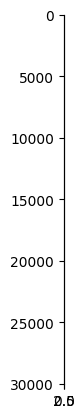

In [26]:
plt.imshow(img[masks[0]["segmentation"]])

# New Section